<a href="https://colab.research.google.com/github/revanks/DIA_EasyOCR/blob/main/EasyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install easyocr

     |████████████████████████████████| 63.6 MB 19 kB/s 
     |████████████████████████████████| 37.1 MB 42 kB/s 


In [2]:
from google.colab import files
uploaded = files.upload()

Saving 1010-receipt.jpg to 1010-receipt.jpg


In [3]:
img='1010-receipt.jpg'

In [4]:
import easyocr
reader=easyocr.Reader(['en'])
import PIL
from PIL import ImageDraw

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


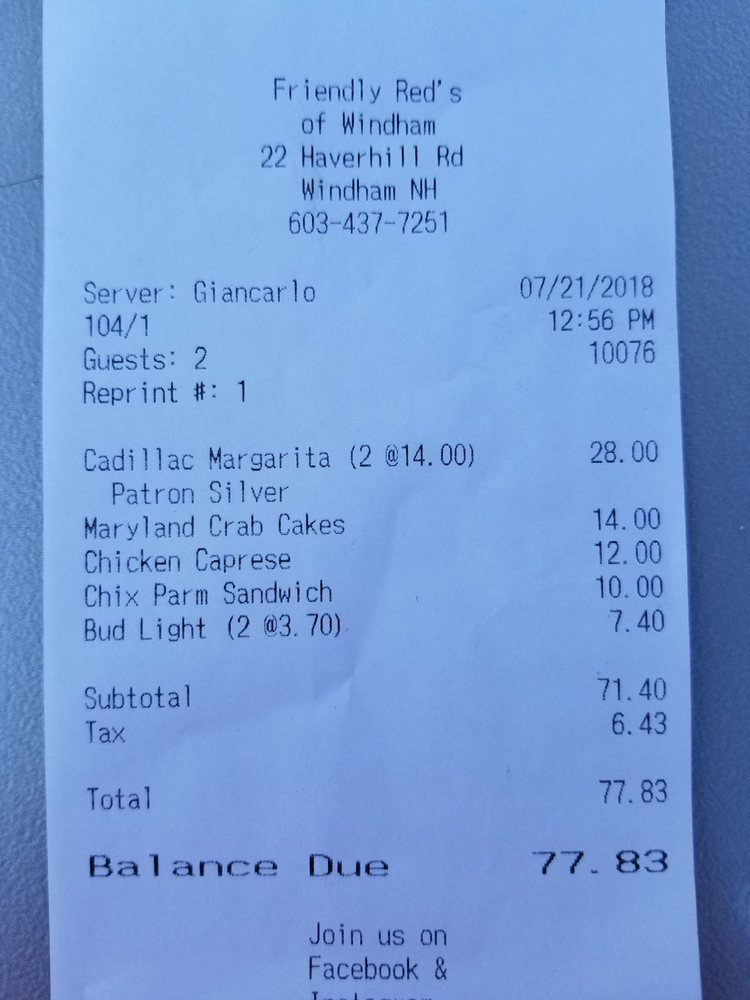

In [5]:
im=PIL.Image.open(img)
im

In [6]:
bound=reader.readtext(img)
bound

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[266, 72], [467, 72], [467, 110], [266, 110]],
  'Frierlly Red" $',
  0.4802386084865847),
 ([[298, 108], [441, 108], [441, 140], [298, 140]],
  'of Wincham',
  0.48131045862885197),
 ([[256, 141], [470, 141], [470, 174], [256, 174]],
  '22 Haverhi |  Rd',
  0.5474742256213506),
 ([[297, 173], [444, 173], [444, 205], [297, 205]],
  'Wincham NH',
  0.6826605508576887),
 ([[283, 205], [455, 205], [455, 241], [283, 241]],
  '603-437-7251',
  0.7944956290538474),
 ([[80, 278], [166, 278], [166, 308], [80, 308]],
  'Server',
  0.9999643756216834),
 ([[188, 276], [320, 276], [320, 308], [188, 308]],
  'Giancarlo',
  0.6035362251079819),
 ([[514, 268], [659, 268], [659, 306], [514, 306]],
  '07/21/2018',
  0.9999832623230254),
 ([[80, 310], [156, 310], [156, 342], [80, 342]], '104/1', 0.9999449818218757),
 ([[544, 306], [660, 306], [660, 336], [544, 336]],
  '12:56 PM',
  0.6180746042983933),
 ([[77, 343], [181, 343], [181, 375], [77, 375]],
  'Guests:',
  0.9985154264362052),
 ([[191, 345

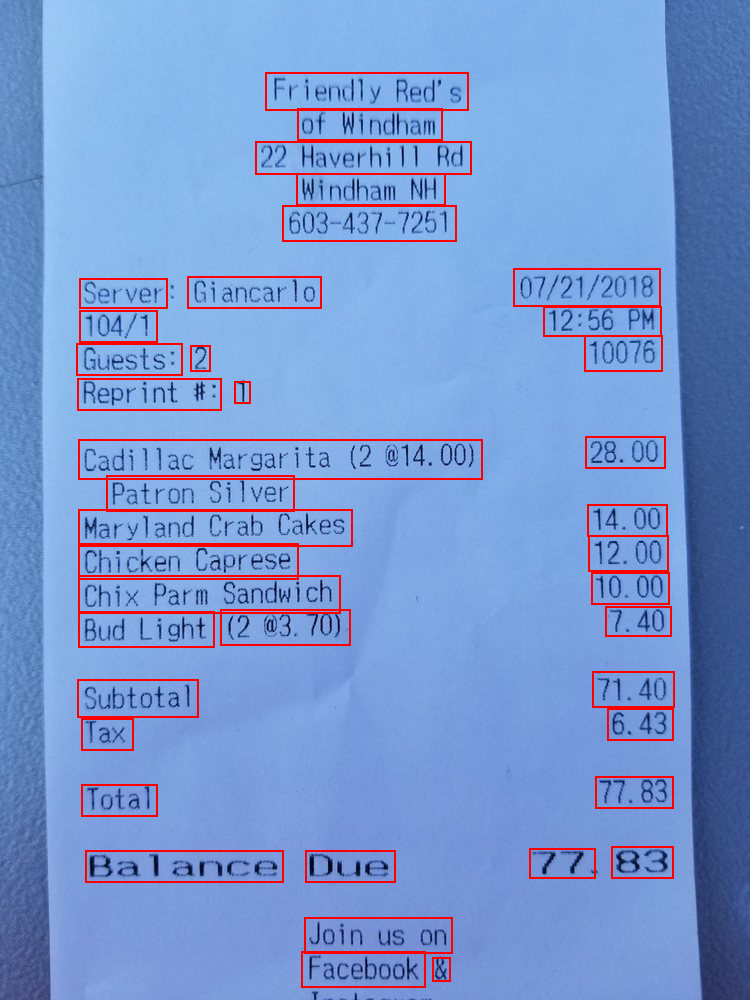

In [9]:
def draw_box(image, bounds, color='red', width=2):
    draw=ImageDraw.Draw(image)
    for bound in bounds:
      p0, p1, p2, p3= bound[0] 
      draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    
    return image
draw_box(im, bound)


In [11]:
bounds =reader.readtext(im, contrast_ths=0.05, adjust_contrast=0.7, add_margin=0.45, width_ths=0.7, decoder="beamsearch" )
bounds

[([[258, 66], [476, 66], [476, 118], [258, 118]],
  'Dely Bed ]',
  0.30436266184668176),
 ([[288, 102], [448, 102], [448, 146], [288, 146]],
  '@L WdhaD',
  0.14940761509159098),
 ([[291, 137], [475, 137], [475, 177], [291, 177]],
  'HwHR]',
  0.135697480950485),
 ([[290, 168], [450, 168], [450, 212], [290, 212]],
  'Mdha ML',
  0.3007382415771242),
 ([[274, 198], [464, 198], [464, 250], [274, 250]],
  '[0343772517]',
  0.46434260751934836),
 ([[73, 273], [171, 273], [171, 313], [73, 313]],
  'Gerver]',
  0.5372067372775143),
 ([[183, 273], [327, 273], [327, 313], [183, 313]],
  'Cancar To]',
  0.2480871554629993),
 ([[506, 262], [668, 262], [668, 314], [506, 314]],
  '[EIo1]',
  0.21625016378216785),
 ([[74, 304], [162, 304], [162, 348], [74, 348]], '[41', 0.28232830402140074),
 ([[539, 301], [665, 301], [665, 341], [539, 341]],
  '[12256 PM',
  0.2031685987325292),
 ([[71, 337], [191, 337], [191, 385], [71, 385]],
  '@uests]n',
  0.12297579011484594),
 ([[577, 329], [669, 329], [669

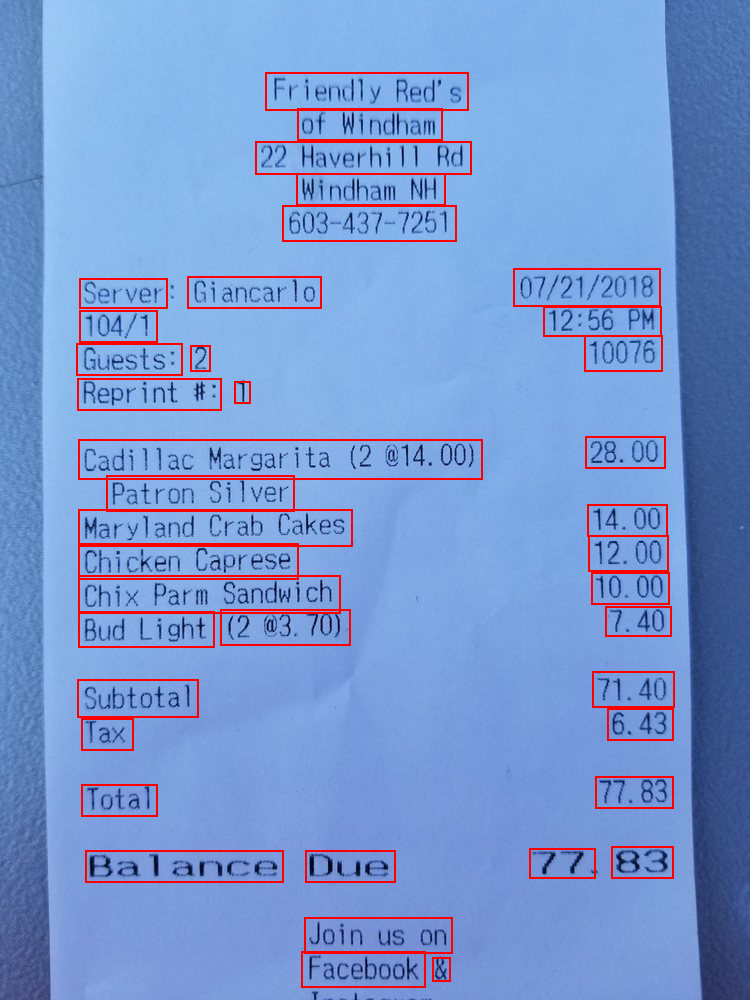

In [12]:
draw_box(im, bound)